In [37]:
%load_ext autoreload
%autoreload 2

import os
import glob
from operator import attrgetter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from analysis import *
from hypergraph.network import Tree, Network

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
networks = sorted(Tree.from_files(glob.glob("output/*tree")), key=attrgetter("codelength"), reverse=True)

ground_truth = next((network for network in networks if "multilayer_self_links" in network.filename))

ground_truth.match_ids(networks)

def write_networks(networks, outdir):
    for network in networks:
        basename = network.pretty_filename
        basename = basename[0].upper() + basename[1:]
        filename = os.path.join(outdir, f"{basename}.tree")
        with open(filename, "w") as fp:
            network.write(fp)


write_networks(networks, "output/matched_ids")
ordered = [
    networks[0],
    networks[3],
    networks[5],
    networks[7],
    networks[1],
    networks[2],
    networks[4],
    networks[6]
]

#ordered = [
#    networks[0],
#    networks[5],
#    networks[4],
#    networks[7],
#    networks[1],
#    networks[2],
#    networks[3],
#    networks[6]
#]

summarize(ordered)

,network,num states,num links,levels,top modules,leaf modules,codelength,variance,completed in,mean assignments,mean eff. assignments
0,Bipartite,1337,3804,4,29,47,7.02259,0.000107,0.890587,1.000000,1.000000
1,"(directed, self-links) Unipartite",1175,44941,5,29,100,6.11423,0.000056,5.180140,1.000000,1.000000
2,(self-links) Multilayer,1902,137657,5,29,98,6.02839,0.000010,23.267800,1.088511,1.082573
3,"(similarity, self-links) Multilayer h-s",1902,137657,5,29,126,5.26911,0.000032,13.927900,1.304681,1.286830
4,(non-backtracking) Bipartite,3077,54388,4,29,47,6.99729,0.000868,19.953000,1.000000,1.000000
5,(directed) Unipartite,1175,43766,5,29,89,6.19552,0.000122,4.959560,1.000000,1.000000
6,Multilayer,1902,133067,5,29,96,6.05923,0.000025,21.582700,1.120000,1.112036
7,(similarity) Multilayer h-s,1902,133067,5,29,126,5.26996,0.000007,13.349200,1.304681,1.286830


In [41]:
from statistics import variance

#lazy
bipartite_cl = [10.526583212, 10.512161837, 10.512161837, 10.513376506, 10.512161837, 10.512161878, 10.526563942, 10.512172504, 10.513387724, 10.512162444, 10.512161837, 10.523591467, 10.528786544, 10.509273855, 10.512163057, 10.512161837, 10.512161837, 10.512162398, 10.526542774, 10.526543496]
unipartite_cl = [10.396167622, 10.395516596, 10.395516596, 10.396167622, 10.395516596, 10.396167622, 10.395380289, 10.395516596, 10.396167622, 10.395350340, 10.395350340, 10.396167622, 10.396167622, 10.395516596, 10.396167622, 10.395516596, 10.395350340, 10.395516596, 10.395516596, 10.395350340]
multilayer_cl = [10.406572017, 10.398327324, 10.407290638, 10.406280726, 10.407269383, 10.404473462, 10.406877194, 10.405544438, 10.407353715, 10.398191510, 10.405238841, 10.405536899, 10.406278320, 10.398640445, 10.407381297, 10.406679764, 10.406263779, 10.398976046, 10.405536899, 10.406955995]
multilayer_hs_cl = [9.842814178, 9.842527931, 9.842871587, 9.842040463, 9.849901084, 9.842502063, 9.842502063, 9.842776942, 9.843258003, 9.843258003, 9.842776942, 9.843258003, 9.843258003, 9.842776942, 9.851655432, 9.842527931, 9.851655432, 9.841699072, 9.850540325, 9.842871587]

#non-lazy
bipartite_cl = [10.349780412, 10.348890963, 10.350190532, 10.349747685, 10.348890963, 10.349780412, 10.363458134, 10.350641134, 10.349780412, 10.348890963, 10.363742452, 10.348890963, 10.348890963, 10.348890963, 10.349576139, 10.360722664, 10.348890963, 10.348890963, 10.361758103, 10.349780412]
unipartite_cl = [10.404042063, 10.404335953, 10.405457428, 10.403179847, 10.403179847, 10.404042063, 10.403375819, 10.404042063, 10.403179847, 10.403179847, 10.403179847, 10.403179847, 10.403179847, 10.403179847, 10.403375819, 10.403179847, 10.404042063, 10.403179847, 10.403179847, 10.405585986]
multilayer_cl = [10.406140763, 10.415038165, 10.414113475, 10.414773842, 10.406938277, 10.414728684, 10.414140814, 10.415805153, 10.413958924, 10.415116290, 10.415518238, 10.415408738, 10.414737068, 10.414224145, 10.406292452, 10.414769818, 10.414777431, 10.414823502, 10.415408738, 10.415435002]
multilayer_hs_cl = [9.861916433, 9.849125649, 9.857331934, 9.857331934, 9.849125649, 9.861916433, 9.862115125, 9.857331934, 9.857216149, 9.867590097, 9.860592933, 9.861916433, 9.857022839, 9.857331934, 9.861916433, 9.860335908, 9.861916433, 9.858529334, 9.861916433, 9.857331934]

variance(bipartite_cl), variance(unipartite_cl), variance(multilayer_cl), variance(multilayer_hs_cl)

(2.9135945896016683e-05,
 5.620106959056872e-07,
 9.763634229719244e-06,
 1.8688327854709738e-05)

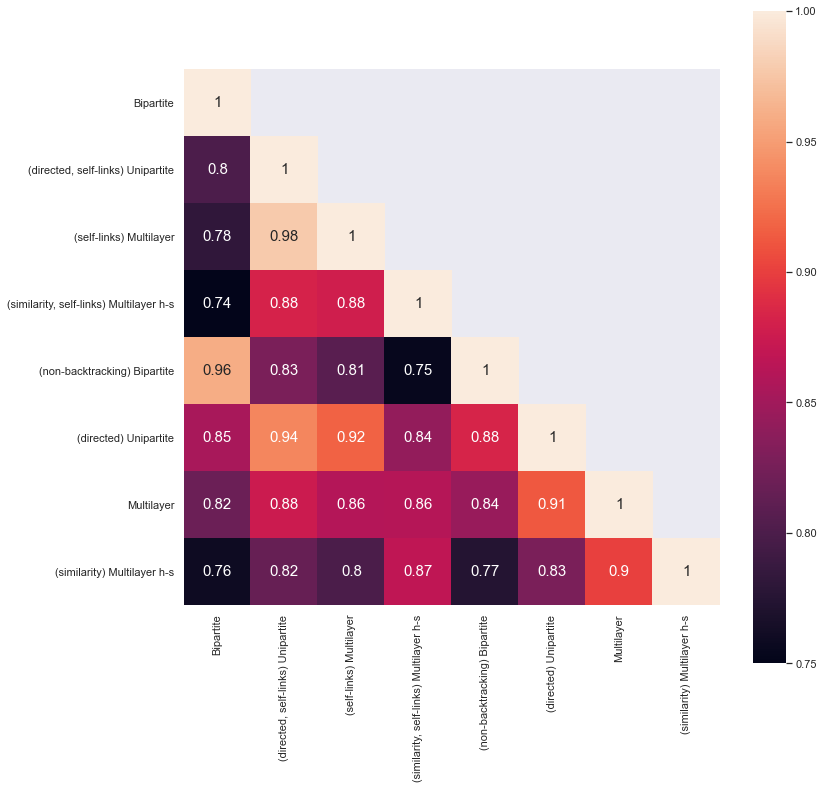

In [190]:
from hypergraph.network import Level
f, ax = plt.subplots(1, 1, figsize=(12,12))
#cbar_ax = f.add_axes([0.95, 0.2, 0.03, 0.6])

#ami_top_score = ami(ordered, level=Level.TOP_MODULE)
ami_leaf_score = ami(ordered, level=Level.LEAF_MODULE)

#plot_heatmap(ami_leaf_score, ax=ax, cbar=True, vmin=0.75, annot_kws={"fontsize": 20}, yticklabels=ami_top_score.columns);

sns.heatmap(ami_leaf_score,
            vmax=1,
            vmin=0.75,
            mask=np.triu(np.ones_like(ami_leaf_score, dtype=bool), k=1),
            cmap=sns.color_palette("rocket", as_cmap=True),
            annot=True,
            ax=ax,
            annot_kws={"fontsize": 15},
            fmt=".2g",
            square=True,
            linewidths=0,
            #ax=ax,
            yticklabels=ami_top_score.columns)
f.savefig("ami-leaf.svg")

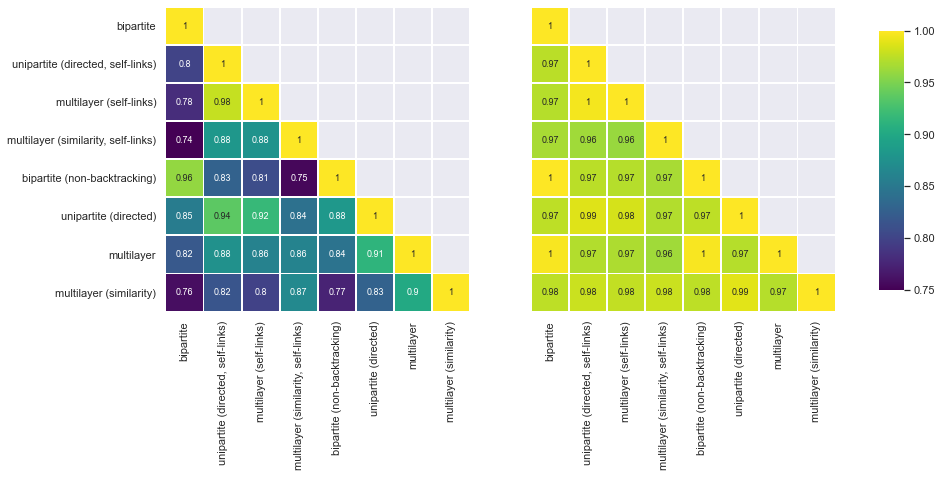

In [14]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
cbar_ax = f.add_axes([0.95, 0.2, 0.03, 0.6])

ami_score = ami(ordered)
jaccard_score = weighted_jaccard_dist(ordered)

plot_heatmap(ami_score, ax=ax[0], cbar=False, yticklabels=ami_score.columns);
plot_heatmap(jaccard_score, ax=ax[1], cbar_ax=cbar_ax, yticklabels=False);

In [3]:
from operator import attrgetter
from itertools import islice

network = ordered[3]
print(network.pretty_filename, end="\n\n")

level = 2

largest_states = {}

for node in network.nodes:
    module = ":".join(map(str, node.path[0:level]))
    if node.path[-1] == 1:
        largest_states[module] = node

for module, phys_nodes in network.physical_nodes(level=level).items():
    #if not module.startswith("7"):
    #    continue
    
    largest_state = largest_states[module]
    largest_phys = sorted(phys_nodes.values(), key=attrgetter("flow"), reverse=True)[0]

    if largest_phys.id != largest_state.id:
        print(module, largest_state.name, "->", largest_phys.name, end="\n")
        
    else:
        print(module, largest_phys.name)

NameError: name 'ordered' is not defined